In [150]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [151]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [152]:
gdf = pd.read_csv('regssdatacsv.csv')

In [153]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [154]:
BOSdf = gdf[gdf.Tm == 'BOS']
MILdf = gdf[gdf.Tm == 'MIL']


In [155]:
BOSdf.Date = BOSdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
BOSdf = BOSdf[(BOSdf['Date'] > pd.to_datetime('20191023', format='%Y%m%d', errors='ignore')) & (BOSdf['Date'] <= pd.to_datetime('20200310', format='%Y%m%d', errors='ignore'))]

MILdf.Date = MILdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
MILdf = MILdf[(MILdf['Date'] > pd.to_datetime('20191024', format='%Y%m%d', errors='ignore'))& (MILdf['Date'] <= pd.to_datetime('20200309', format='%Y%m%d', errors='ignore'))]


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

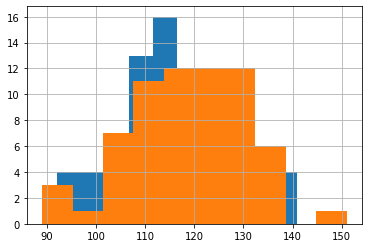

In [156]:
BOSdf.TeamPTS.hist()
MILdf.TeamPTS.hist()

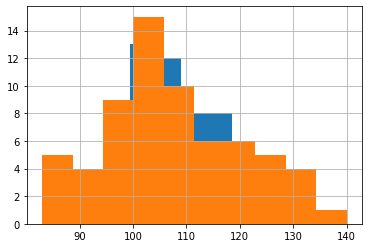

In [157]:
BOSdf.OpponentPTS.hist()
MILdf.OpponentPTS.hist()

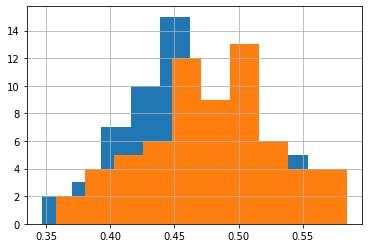

In [158]:
BOSdf.TeamFGP.hist()
MILdf.TeamFGP.hist()

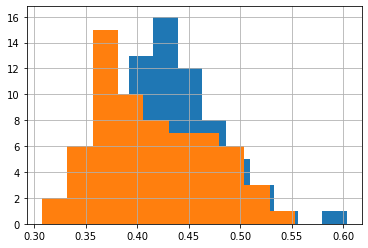

In [159]:
BOSdf.OpponentFGP.hist()
MILdf.OpponentFGP.hist()

In [160]:
BOSmeanpts = BOSdf.TeamPTS.mean()
MILmeanpts = MILdf.TeamPTS.mean()
BOSfgp = BOSdf.TeamFGP.mean()
MILfgp = MILdf.TeamFGP.mean()
BOSsdpts = BOSdf.TeamPTS.std()
MILsdpts = MILdf.TeamPTS.std()

BOSmeaMILp = BOSdf.OpponentPTS.mean()
MILmeaMILp = MILdf.OpponentPTS.mean()
BOSfgpopp = BOSdf.OpponentFGP.mean()
MILfgpopp = MILdf.OpponentFGP.mean()
BOSsdopp = BOSdf.OpponentPTS.std()
MILsdopp = MILdf.OpponentPTS.std()

print("BOS Mean ", BOSmeanpts)
print("BOS FG% ", BOSfgp)
print("BOS Points Standard Deviation ", BOSsdpts)
print("MIL Points Mean ", MILmeanpts)
print("MIL FG% ", MILfgp)
print("MIL Points Standard Deviation ", MILsdpts)

print("BOS OppPoints Mean ", BOSmeaMILp)
print("BOS OppFG% Mean ", BOSfgpopp)
print("BOS OppPoints SD ", BOSsdopp)
print("MIL OppPoints Mean ", MILmeaMILp)
print("MIL OppFG% Mean ", MILfgpopp)
print("MIL OppPoints SD ", MILsdopp)

BOS Mean  113.0
BOS FG%  0.46034375000000005
BOS Points Standard Deviation  11.069764339844031
MIL Points Mean  118.64615384615385
MIL FG%  0.4783692307692308
MIL Points Standard Deviation  11.782442935930627
BOS OppPoints Mean  106.828125
BOS OppFG% Mean  0.4423437499999999
BOS OppPoints SD  10.976966776080477
MIL OppPoints Mean  107.35384615384615
MIL OppFG% Mean  0.41407692307692295
MIL OppPoints SD  13.054490091093623


In [161]:
def gameSim():
    BOSScore = (rnd.gauss(BOSmeanpts,BOSsdpts)+ rnd.gauss(MILmeaMILp,MILsdopp))/2
    MILScore = (rnd.gauss(MILmeanpts,MILsdpts)+ rnd.gauss(MILmeaMILp,MILsdopp))/2
    if int(round(BOSScore)) > int(round(MILScore)):
        return 1
    elif int(round(BOSScore)) < int(round(MILScore)):
        return -1
    else: return 0

In [162]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('BOS Win ', team1win/(team1win+team2win),'%')
    print('MIL Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [163]:
gAmesSim(10000)

BOS Win  0.4126409434157443 %
MIL Win  0.5873590565842557 %


[-1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 0,
 1,
 1,
 -1,
 1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 0